                high
timestamp           
1999-12-31 -0.428595
2000-01-31 -0.423991
2000-02-29 -0.310318
2000-03-31  0.154320
2000-04-28 -0.070752


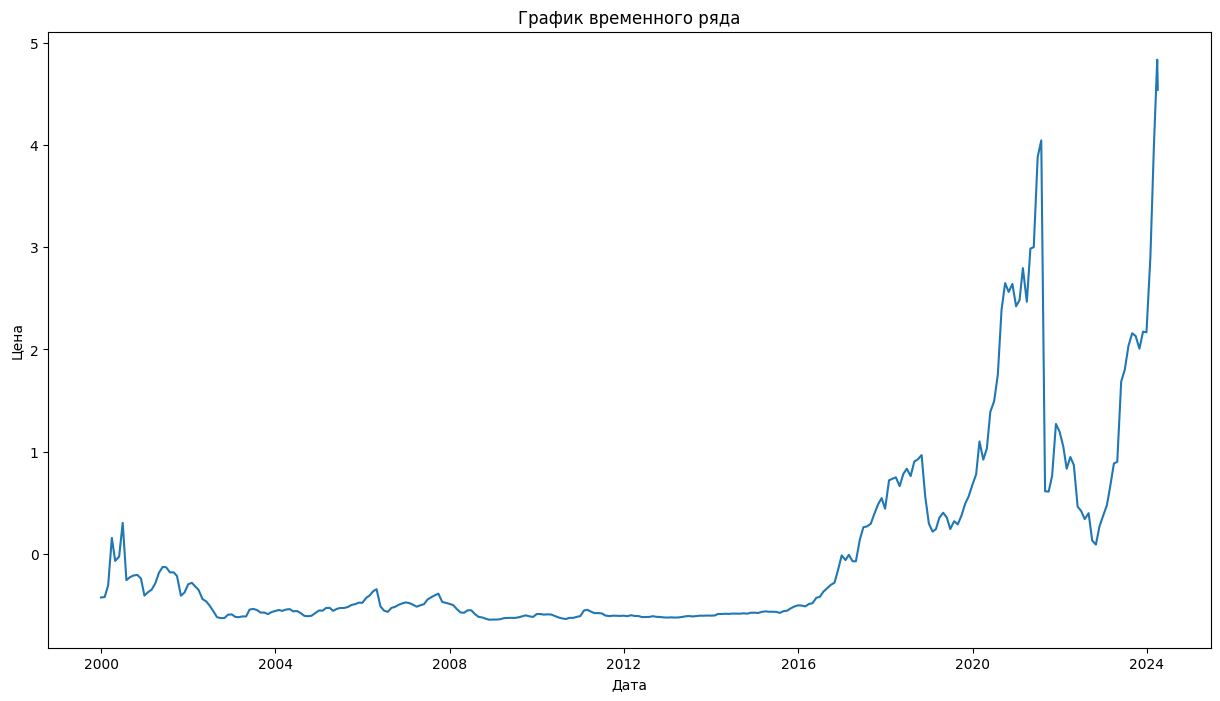

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

high_price = pd.read_csv('nvda_data.csv', usecols=['timestamp', 'high']) 

high_price['timestamp'] = pd.to_datetime(high_price['timestamp'])

high_price.set_index('timestamp', inplace=True)

high_price = high_price[::-1]

high_price[['high']] = scaler.fit_transform(high_price[['high']])

print(high_price.head())

    
plt.figure(figsize=(15,8))
plt.plot(high_price['high'])
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

print('Результат теста:')
df_result = adfuller(high_price['high'])
df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(df_result, df_labels):
    print(label + ' : ' + str(result_value))

if df_result[1] <= 0.05:
    print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
else:
    print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")

Результат теста:
ADF Test Statistic : -0.3719389785942731
p-value : 0.9146795917337094
#Lags Used : 9
Number of Observations Used : 283
Слабые доказательства против нулевой гипотезы, ряд не является стационарным.


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import itertools
import warnings
warnings.filterwarnings("ignore")


def search_optimal_sarima(high_price, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]
       
    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = SARIMAX(
                    high_price,
                    order=order_param,
                    seasonal_order=seasonal_param,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 12
search_optimal_sarima(high_price, seasonal_cycle_length)



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41549D+00    |proj g|=  2.77602D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   6.934D-06   1.415D+00
  F =   1.4154868100688565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     19      1     0     0   1.002D-05   1.061D+00
  F =   1.0614967103340962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16387D+00    |proj g|=  1.44613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.05656D+00    |proj g|=  2.52297D-02

At iterate   10    f=  1.05490D+00    |proj g|=  1.53733D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   1.537D-06   1.055D+00
  F =   1.0549014705496809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16089D+00    |proj g|=  7.59263D-01

At iterate    5    f=  8.61105D-01    |proj g|=  2.77709D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29264D-01    |proj g|=  6.33574D-01

At iterate    5    f=  6.14226D-01    |proj g|=  3.92981D-01

At iterate   10    f=  6.06790D-01    |proj g|=  4.35497D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   1.416D-06   6.068D-01
  F =  0.60679018559825537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08210D+00    |proj g|=  7.92578D-01

At iterate    5    f=  6.67271D-01    |proj g|=  8.65131D-02

At iterate   10    f=  6.24254D-01    |proj g|=  2.61835D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   7.102D-06   6.242D-01
  F =  0.62417217136625058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73304D-02    |proj g|=  2.62966D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     19      1     0     0   1.351D-04   6.732D-02
  F =   6.7318739050350351E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.25522D-01    |proj g|=  1.80787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     16      1     0     0   1.354D-06   1.255D-01
  F =  0.12552201818883876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81147D-02    |proj g|=  1.44516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41857D-01    |proj g|=  6.66635D-01

At iterate    5    f=  1.16469D-01    |proj g|=  2.00782D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     19      1     0     0   1.910D-05   1.161D-01
  F =  0.11606674758298374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52148D-02    |proj g|=  2.50795D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      8      1     0     0   2.420D-06   6.505D-02
  F =   6.5050458295420346E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.60074D-02    |proj g|=  2.70705D-02

At iterate   10    f=  5.53998D-02    |proj g|=  7.82017D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   6.075D-06   5.540D-02
  F =   5.5399349598302963E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82596D-01    |proj g|=  6.29415D-01

At iterate    5    f=  2.63680D-01    |proj g|=  4.08270D-02

       

 This problem is unconstrained.



At iterate    5    f=  1.13663D-01    |proj g|=  2.27800D-02

At iterate   10    f=  1.13027D-01    |proj g|=  4.50667D-04

At iterate   15    f=  1.13027D-01    |proj g|=  1.31388D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.314D-05   1.130D-01
  F =  0.11302660393510701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.58201D-02    |proj g|=  1.49140D-04


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   1.491D-04   6.582D-02
  F =   6.5820122384931470E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10773D-01    |proj g|=  1.10894D+00

At iterate    5    f=  5.75336D-02    |proj g|=  1.38023D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.99105D-02    |proj g|=  7.59723D-02

At iterate   15    f=  5.70003D-02    |proj g|=  3.78893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   8.359D-06   5.700D-02
  F =   5.6999278069049544E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80846D-01    |proj g|=  5.77157D-01

At iterate    5    f=  2.60319D-01    |proj g|=  7.44446D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.76186D-01    |proj g|=  2.11598D-01

At iterate   10    f=  1.17191D-01    |proj g|=  1.46140D-01

At iterate   15    f=  1.15620D-01    |proj g|=  8.93731D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.358D-04   1.156D-01
  F =  0.11561947960887305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37782D-02    |proj g|=  1.64910D-02

At iterate    5    f=  6.37144D-02    |proj g|=  3.35211D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   1.616D-07   6.371D-02
  F =   6.3714377630410823E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64771D-01    |proj g|=  2.37427D+00

At iterate    5    f=  6.10915D-02    |proj g|=  2.92911D-01

At iterate   10    f=  5.72631D-02    |proj g|=  5.21587D-02

At iterate   15    f=  5.39566D-02    |proj g|=  5.17749D-03

At iterate   20    f=  5.39364D-02    |proj g|=  9.57033D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   9.570D-06   5.394D-02
  F =   5.3936361872557265E-002

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.54178D-01    |proj g|=  1.13489D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.122D-05   2.542D-01
  F =  0.25417804185588416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56475D-01    |proj g|=  3.43088D-01

At iterate    5    f=  2.66203D-01    |proj g|=  2.69176D-01

At iterate   10    f=  1.14554D-01    |proj g|=  1.90669D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15286D-01    |proj g|=  6.54450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      6      1     0     0   5.527D-05   4.153D-01
  F =  0.41528636690648879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59446D-02    |proj g|=  4.69331D-02

At iterate    5    f=  5.57840D-02    |proj g|=  1.66848D-03

At iterate   10    f=  5.57839D-02    |proj g|=  3.63142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   2.899D-05   5.578D-02
  F =   5.5783864749176570E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   3.363D-05   1.134D-01
  F =  0.11344131736611598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45097D-02    |proj g|=  2.43179D-02

At iterate    5    f=  6.28638D-02    |proj g|=  8.02989D-02

At iterate   10    f=  5.80615D-02    |proj g|=  6.30103D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     25      1     0     0   8.471D-06   5.107D-02
  F =   5.1066124048630306E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15919D-01    |proj g|=  1.00839D-02

At iterate    5    f=  4.15843D-01    |proj g|=  1.16865D-02

At iterate   10    f=  3.91164D-01    |proj g|=  2.99426D-01

At iterate   15    f=  3.85482D-01    |proj g|=  1.20467D-04

       

 This problem is unconstrained.



At iterate    5    f=  1.24815D-01    |proj g|=  2.50388D-02

At iterate   10    f=  1.24668D-01    |proj g|=  2.30885D-02

At iterate   15    f=  1.16905D-01    |proj g|=  6.25774D-02

At iterate   20    f=  1.15480D-01    |proj g|=  7.81961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     40      1     0     0   1.408D-05   1.155D-01
  F =  0.11547975599063424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.18987D-02    |proj g|=  1.10128D-01

At iterate   15    f=  5.08873D-02    |proj g|=  3.81786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     26      1     0     0   2.686D-06   5.089D-02
  F =   5.0887227601706046E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63426D-02    |proj g|=  3.62481D-02

At iterate    5    f=  5.55243D-02    |proj g|=  3.02471D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  2.43182D-01    |proj g|=  1.25378D-01

At iterate   20    f=  2.42487D-01    |proj g|=  5.27112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     37      1     0     0   3.646D-05   2.425D-01
  F =  0.24248718762495766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00249D-01    |proj g|=  1.12890D+00


 This problem is unconstrained.



At iterate    5    f=  1.14653D-01    |proj g|=  1.96063D-02

At iterate   10    f=  1.14094D-01    |proj g|=  2.90361D-02

At iterate   15    f=  1.09745D-01    |proj g|=  2.29866D-01

At iterate   20    f=  1.07271D-01    |proj g|=  2.15837D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   9.630D-06   1.073D-01
  F =  0.10726760210707358     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:37.24833805491359


In [5]:

model = SARIMAX(high_price, order=(0, 1, 1), seasonal_order=(1, 0, 0, 12))

results = model.fit()

print(results.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59316D-02    |proj g|=  5.29691D-02

At iterate    5    f=  5.57501D-02    |proj g|=  2.89658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   6.356D-05   5.575D-02
  F =   5.5749931968843355E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                      
Dep. Variable:                          

 This problem is unconstrained.


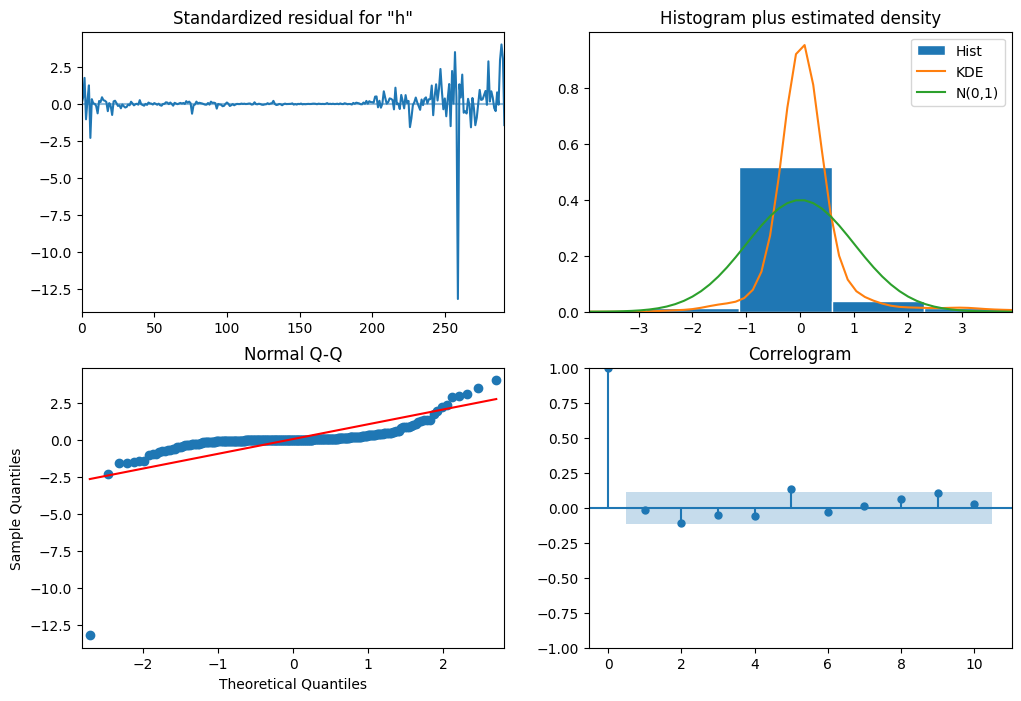

In [6]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()



Среднеквадратичная ошибка прогноза составляет 0.07


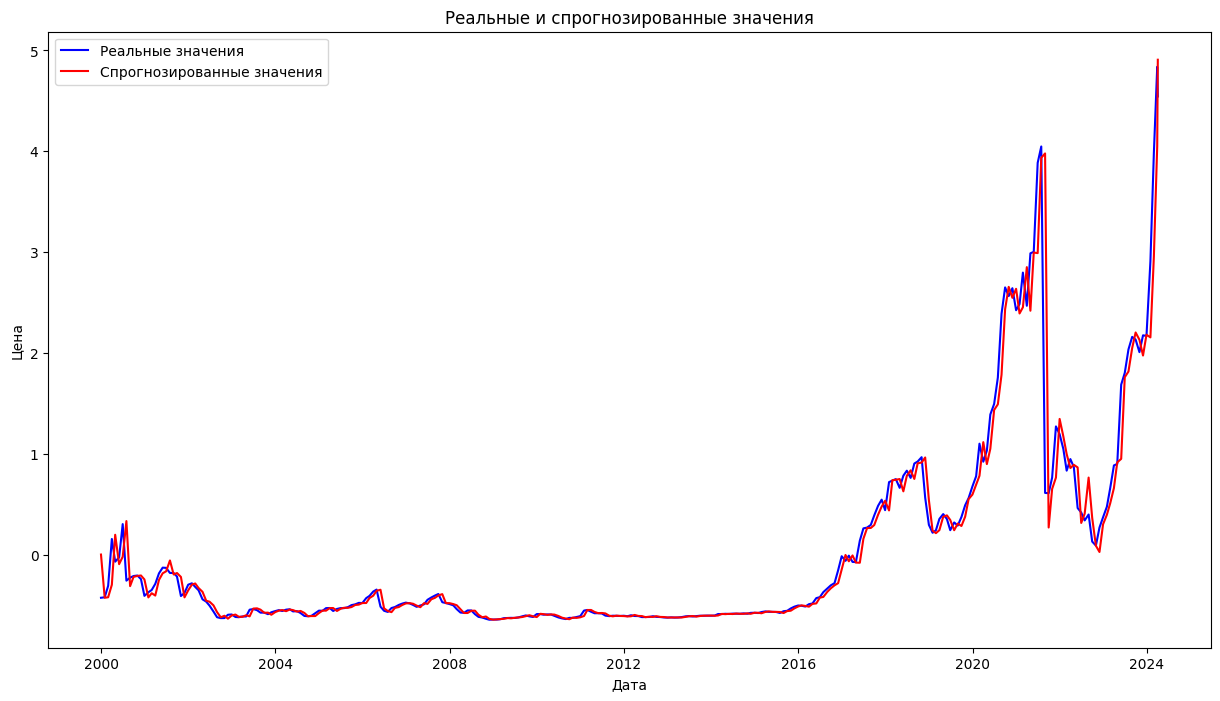

In [7]:
st_pred = results.get_prediction(start=pd.to_datetime('1999-12-31'), dynamic=False) 
forecast_values = st_pred.predicted_mean

actual_values = high_price['1999-12-31':]['high']
forecast_mse = ((forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка прогноза составляет {}'.format(round(forecast_mse, 2)))

plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(forecast_values.index, forecast_values, label='Спрогнозированные значения', color='red')

plt.title('Реальные и cпрогнозированные значения')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.show()

Среднеквадратичная ошибка динамического прогноза составляет 2.54


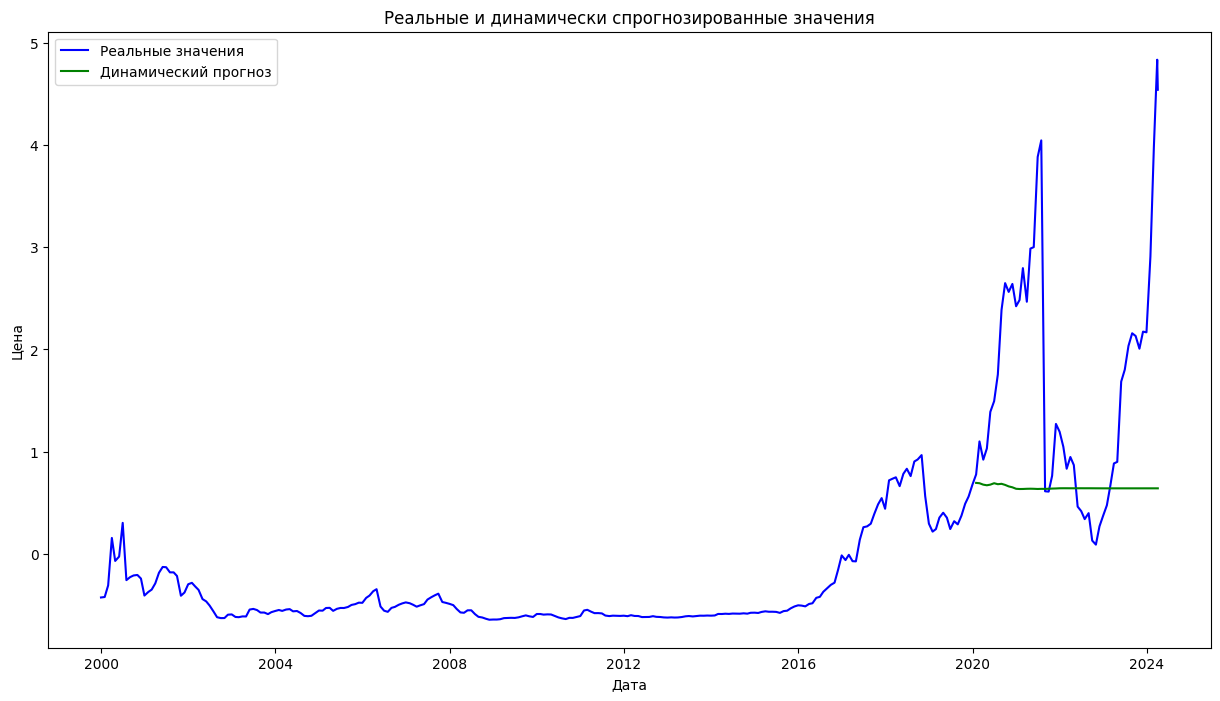

In [8]:
dyn_pred = results.get_prediction(start=pd.to_datetime('2020-01-31'), dynamic=True) 
dynamic_forecast_values = dyn_pred.predicted_mean

mse_dynamic_forecast = ((dynamic_forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка динамического прогноза составляет {}'.format(round(mse_dynamic_forecast, 2)))

plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(dynamic_forecast_values.index, dynamic_forecast_values, label='Динамический прогноз', color='green')

plt.title('Реальные и динамически спрогнозированные значения')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.show()


Средние прогнозируемые значения:

293    4.411308
294    4.396677
295    4.367458
296    4.351928
297    4.355251
298    4.370873
299    4.349917
300    4.350737
301    4.257617
302    4.122850
303    4.015855
304    4.052753
Name: predicted_mean, dtype: float64

Доверительные интервалы:

     lower high  upper high
293    3.909947    4.912669
294    3.654242    5.139112
295    3.444931    5.289985
296    3.279127    5.424729
297    3.150780    5.559721
298    3.047772    5.693974
299    2.917981    5.781854
300    2.817672    5.883803
301    2.629694    5.885541
302    2.405299    5.840401
303    2.213126    5.818583
304    2.168695    5.936812


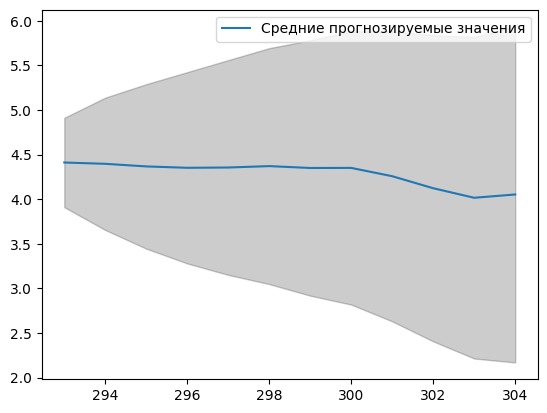

In [9]:
pred_future = results.get_forecast(steps=12)

print(f'Средние прогнозируемые значения:\n\n{pred_future.predicted_mean}')
print(f'\nДоверительные интервалы:\n\n{pred_future.conf_int()}')

fig = plt.figure()
plt.plot(pred_future.predicted_mean, label='Средние прогнозируемые значения')
plt.fill_between(pred_future.conf_int().index,
                 pred_future.conf_int().iloc[:, 0],
                 pred_future.conf_int().iloc[:, 1], color='k', alpha=.2)
plt.legend()  
plt.show()